# Feedforward Network Demo

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yad

Load Dataset

Shape of x: (100, 2)
Shape of y: (100,)


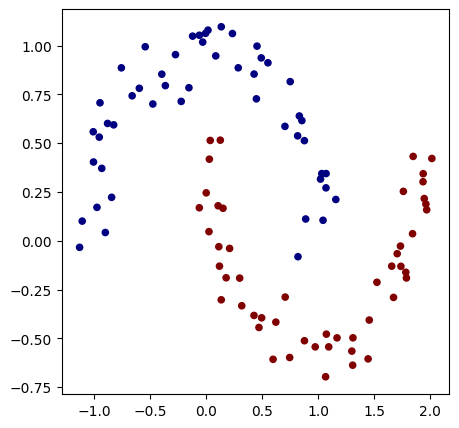

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.1)

x = x.astype(np.float32)
y = y.astype(np.float32)

print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

# Visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet')

x = yad.Tensor(x)
y = yad.Tensor(y)

Define Model

In [3]:
from yad import nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Network with three layers: two 16 neuron layers and one single neuron layer.

        self.linear1 = nn.Linear(in_features=2,  out_features=16)
        self.linear2 = nn.Linear(in_features=16, out_features=16)
        self.linear3 = nn.Linear(in_features=16, out_features=1)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)

        return x

Train Model

In [4]:

model = Model()

y_pred = model(x)

print(y_pred.shape)

(100, 1)
